## Plotting

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xmin = -2*np.pi
xmax = 2*np.pi

r = np.arange(xmin,xmax,0.1)

y1 = -np.sin(r)*np.cos(r)
y2 = np.sin(r)/r

Text(0.5, 1.0, 'Two functions on one plot')

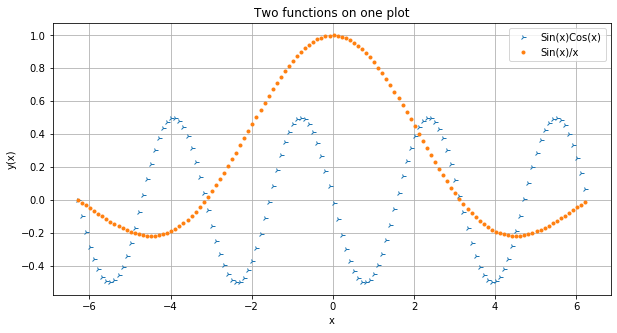

In [3]:
plt.figure(figsize=(10,5))
plt.xlabel('x')
plt.ylabel('y(x)')

plt.plot(r,y1,'4',lw=2)
plt.plot(r,y2,'.',lw=2)

plt.grid(True)
plt.legend(["Sin(x)Cos(x)","Sin(x)/x"])

plt.title('Two functions on one plot')

### Subplots

In [4]:
xmin = -5; xmax =5; Npoints=500
dx = (xmax-xmin)/Npoints

x1 = np.arange(xmin,xmax,dx) #creating different x arrays
x2 = np.arange(xmin,xmax,dx/20)

y1 = -np.sin(x1)*np.cos(x1*x1)
y2 = np.exp(-x2/4)*np.sin(x2)

y3 = np.exp(-x1**2/4)
y4 = np.sin(x2)

<IPython.core.display.Javascript object>


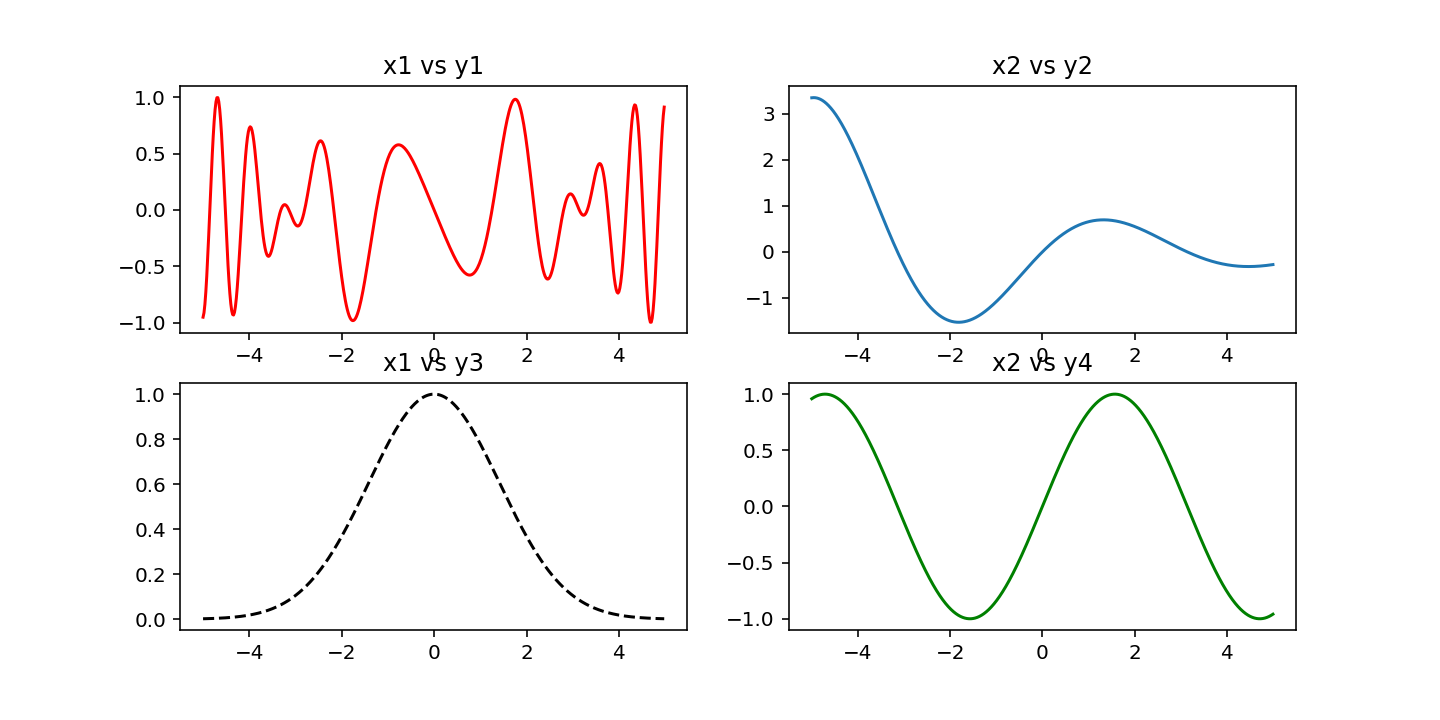

In [6]:
%matplotlib Notebook

plt.figure(1,figsize=(10,5))

plt.subplot(2,2,1)   #2 rows, 2 column, plot1
plt.plot(x1,y1,'r')
plt.title('x1 vs y1')
plt.show()

plt.subplot(2,2,2) #2 rows, 2 column,plot2
plt.plot(x2,y2,'-')
plt.title('x2 vs y2')
plt.show()

plt.subplot(2,2,3)#2 rows, 2 column,plot3
plt.plot(x1,y3,'k--')
plt.title('x1 vs y3')
plt.show()

plt.subplot(2,2,4)#2 rows, 2 column,plot4
plt.plot(x2,y4,'g')
plt.title('x2 vs y4')
plt.show()

<IPython.core.display.Javascript object>


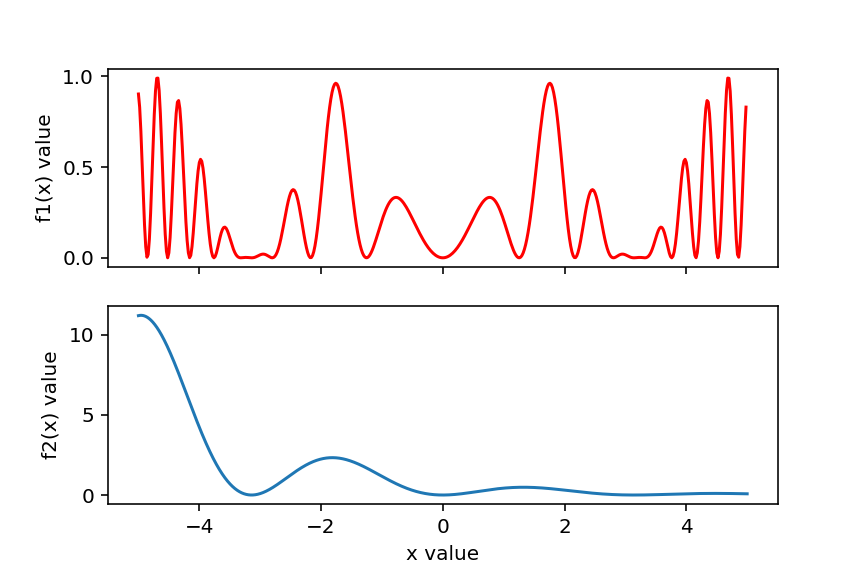

In [7]:
%matplotlib Notebook
fig,ax = plt.subplots(2,1,sharex=True)

ax[0].plot(x1,y1*y1,'r')

ax[1].set_xlabel("x value")
ax[1].set_ylabel("f2(x) value")
ax[0].set_ylabel("f1(x) value")
ax[1].plot(x2,y2*y2,'-')

plt.savefig("subplotexample.pdf")
plt.show()

### Colour Magnitude Diagrams

In [8]:
from astropy.io import fits

In [9]:
M42 = fits.open('frame-u-006073-4-0063.fits')

In [10]:
M42

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f3e0d5374e0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f3e0d5287b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f3e0d528e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f3e06ecccc0>]

In [11]:
M42.info()

Filename: frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [12]:
M42[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [13]:
data = M42[0].data

In [18]:
print(type(data))#data from M42 fits file is now stored in a 2D array
print(np.min(data))
print(np.max(data))
print(np.mean(data))
print(np.std(data))

<class 'numpy.ndarray'>
-0.34472656
552.0
5.3398747
15.16415


<IPython.core.display.Javascript object>


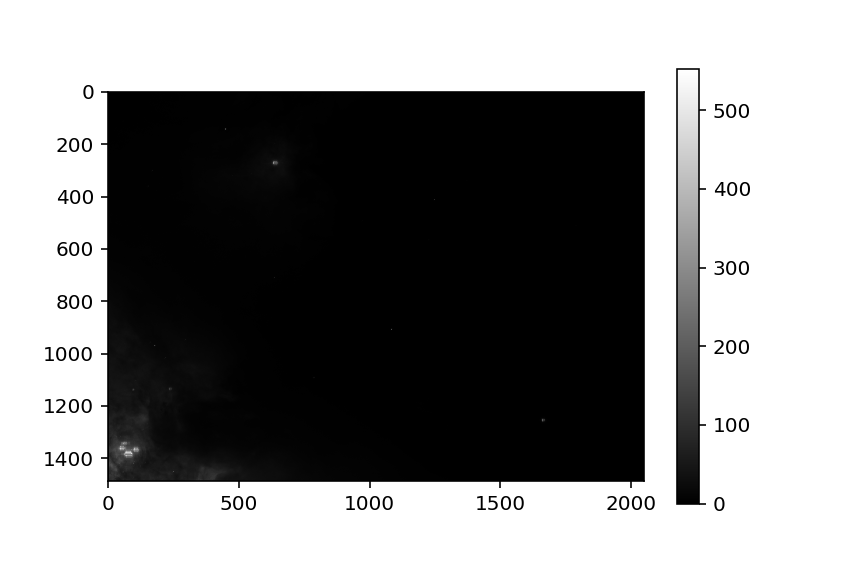

In [19]:
plt.imshow(data, cmap='gray')
plt.colorbar()

<IPython.core.display.Javascript object>


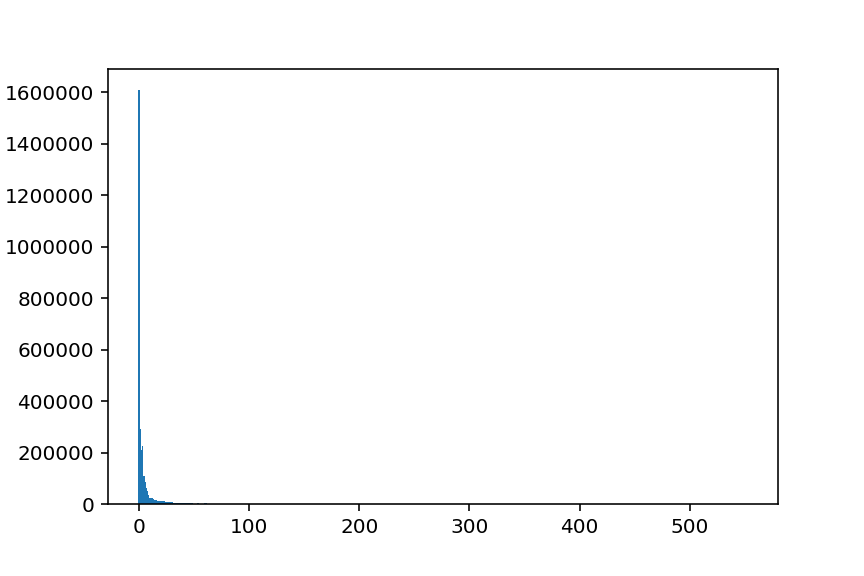

In [23]:
histogram = plt.hist(data.flat, bins=500, histtype='bar')

<IPython.core.display.Javascript object>


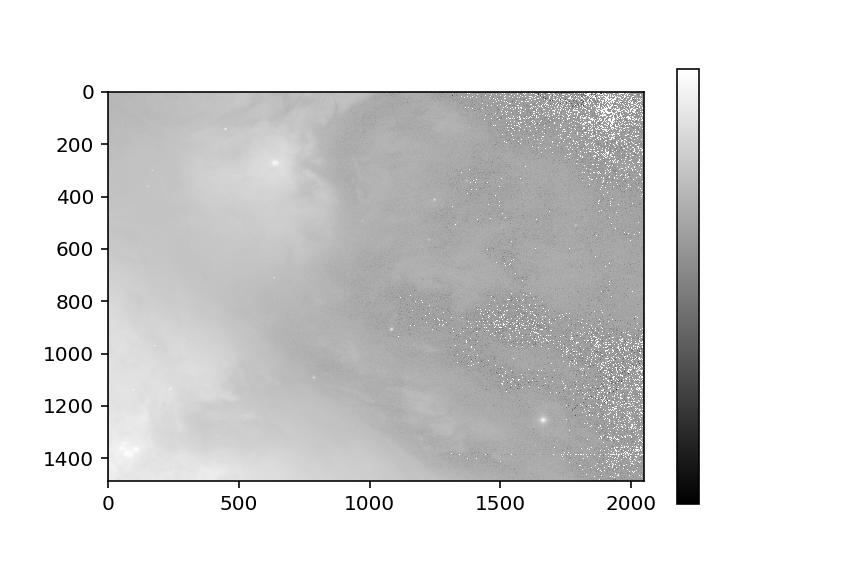

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

In [24]:
from matplotlib.colors import LogNorm

plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])